**DISCLAIMER**

The written and verbal content of this exhibition are the exhibitor's own and under no circumstances does it reflect the position of his or her employers. Likewise, the opinions expressed in this training are those of the speaker and do not reflect the presentation of his or her employers.

**DESCARGO DE RESPONSABILIDAD**

El contenido escrito y verbal de esta exposición son propios del expositor y bajo ninguna circunstancia refleja la posición de sus empleadores. De igual manera las opiniones vertidas en este entrenamiento son propias del expositor y no reflejan la exposición de sus empleadores.

# **Quito AI workshop**

**Done by:**
Sebastian Sarasti

Data Scientist and Machine Learning Engineer
LinkedIn: https://www.linkedin.com/in/sebastiansarasti/

## **Tools**

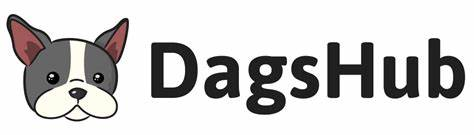

https://dagshub.com/

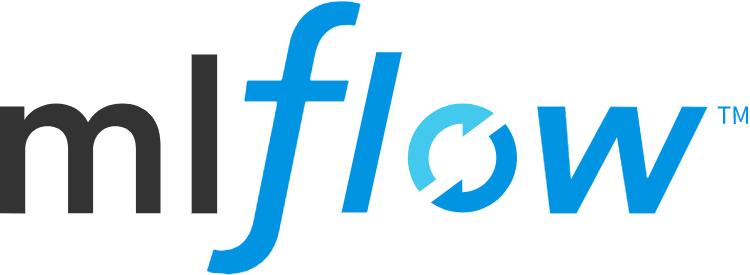

## **Model repositories**:

- GitHub: https://github.com/sebassaras02/quito-ai-day
- Dagshub: https://dagshub.com/sebassaras02/quito-ai-day

# **Unsupervised learning**




**Customer segmentation**

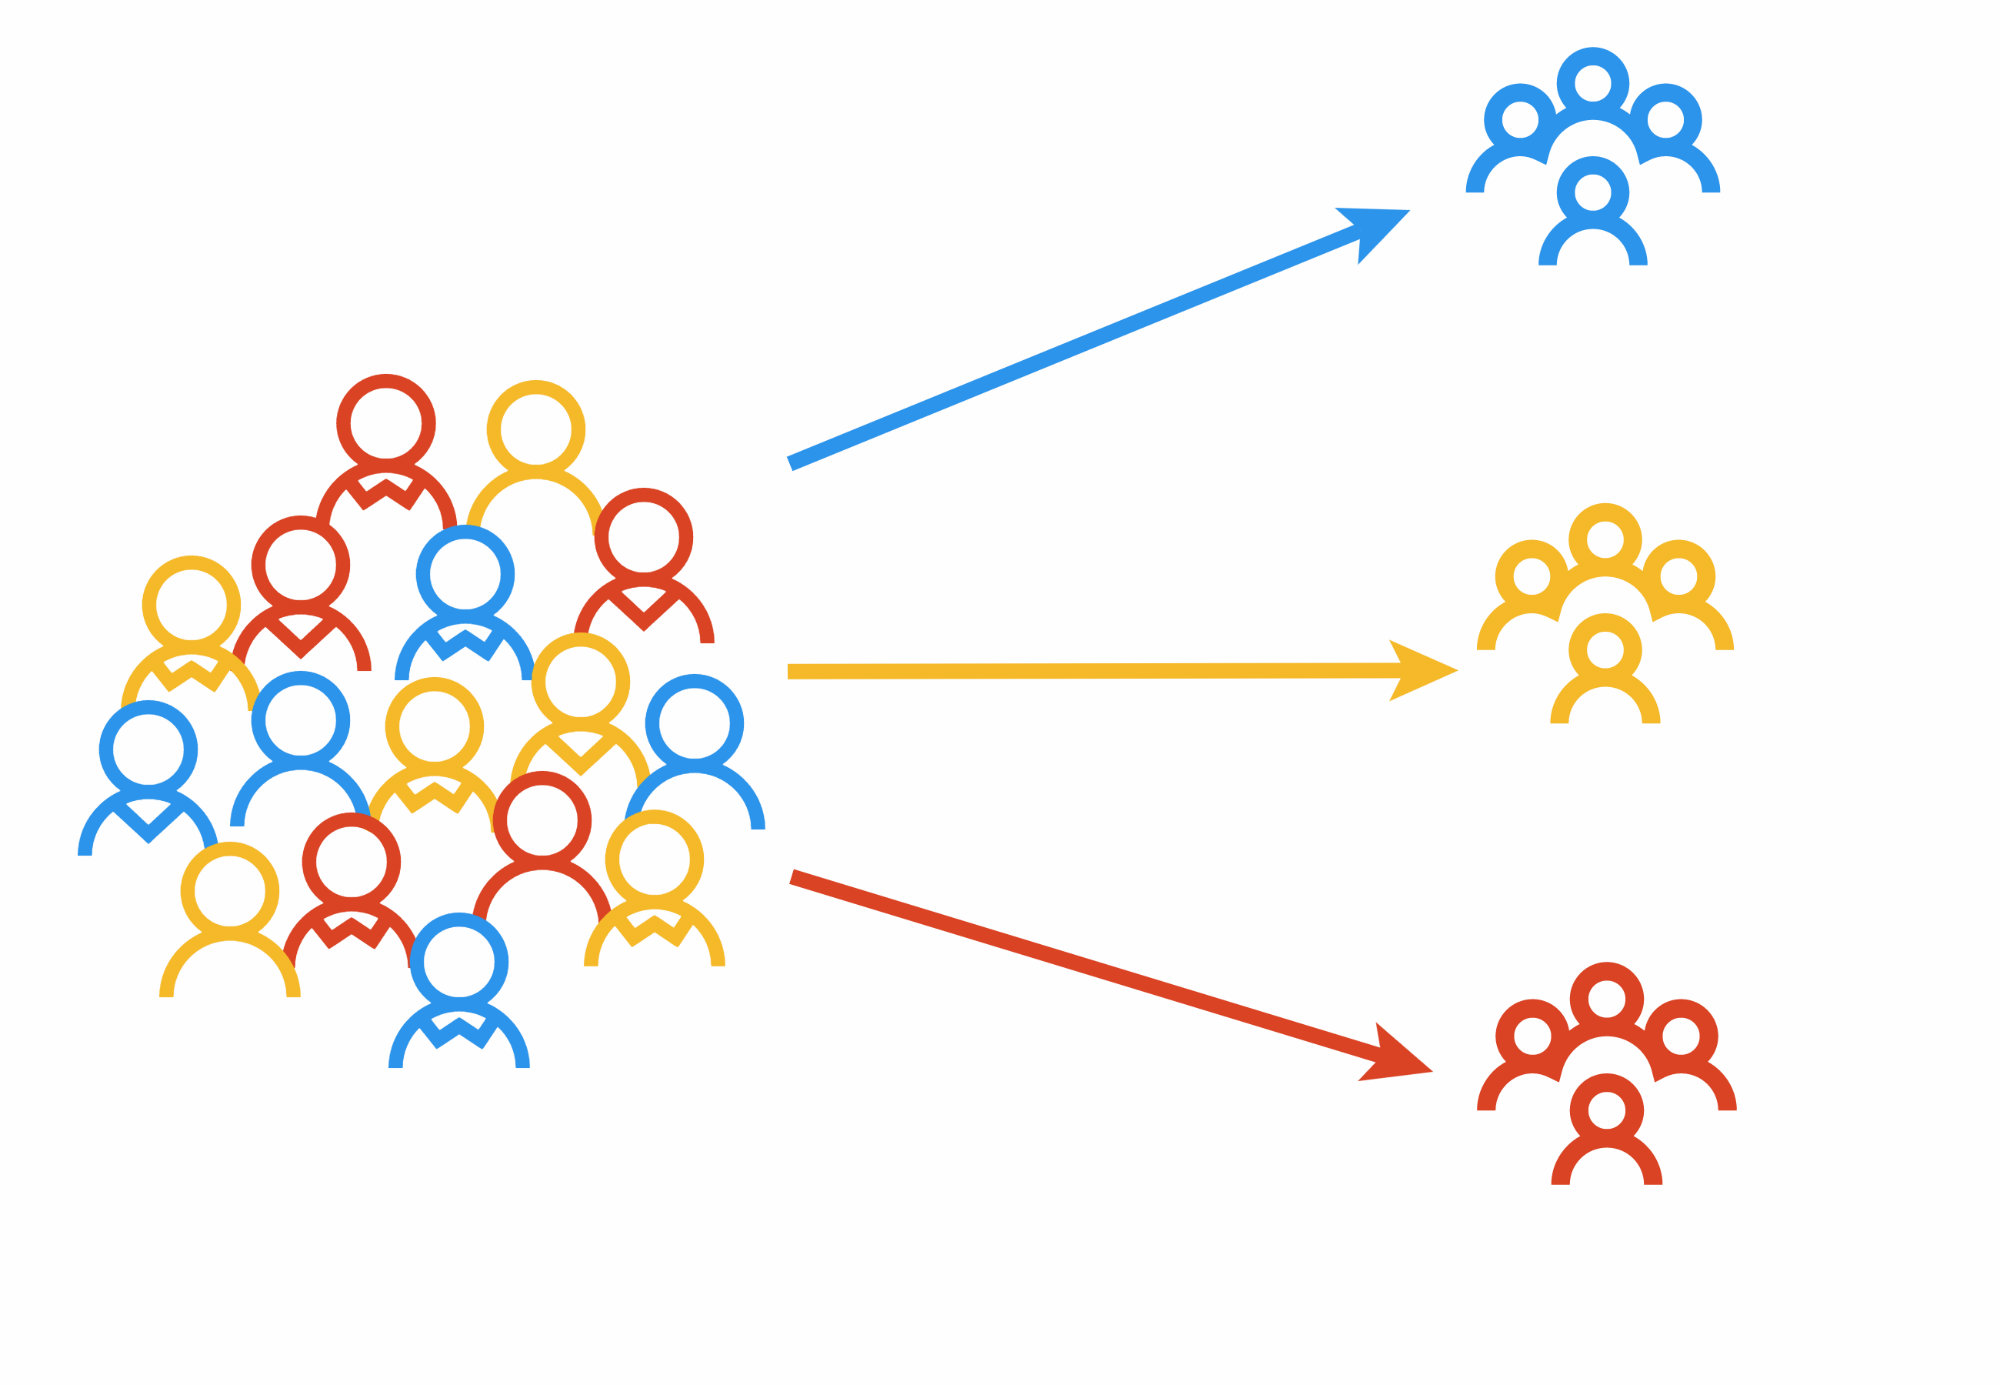

**Image segmentation**

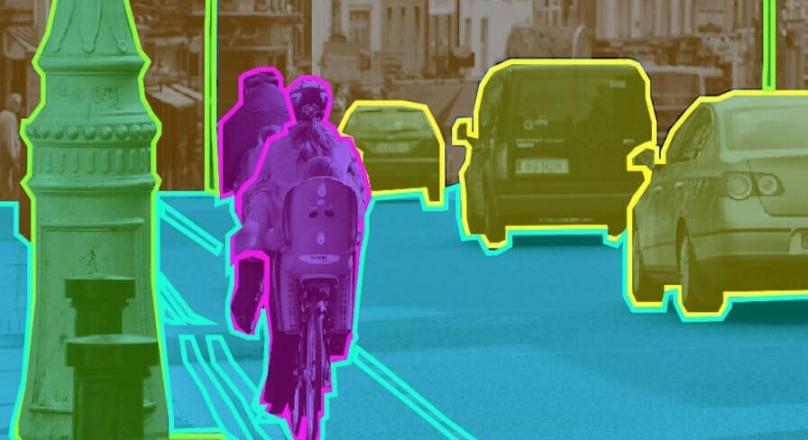

Segment anything (SAM) - Meta

https://segment-anything.com/demo

**Main Topic Identification**

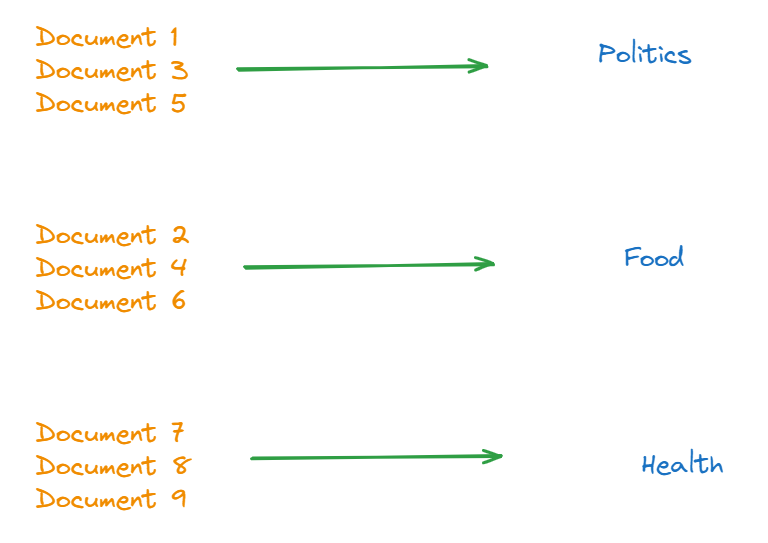

### **Data Processing**

Download the dataset to use

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', shuffle = True, remove=('headers', 'footers', 'quotes'),
                                categories=['alt.atheism', 'soc.religion.christian', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                                            'rec.sport.baseball', 'rec.sport.hockey', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc'])

See what data look like

In [ ]:
newsgroups.data[1]

'I bought a 386DX33 system a little over 2 years ago, and was satisfied with\neverything about Zeos.  That computer went off to grad school with my son and\nI replaced it with a 486DX2/66 pkg 4 (345 MBHD, 16MB ram) with Diamond Viper,\n128K level 2 cache, and tower upgrades, delete the CTX monitor.  I got a\n17" HP D1193A monitor employee purchase.  This is a *great* system, fast,\nquiet, solidly built, not a single glitch bringing it up.  Tech support seems \nbusier now than 2 years ago.  I called with a configuration question, and\nthey called back 4 hours later with the right answer.  I think there\'s a\nslight premium over Gateway prices, but IMHO Zeos is worth it. BTW they \nhave enough 800 lines that I\'ve never gotten a busy signal calling sales,\ncustomer service, or tech support. Now, you usually wait 5 or 10 minutes to\ntalk to someone, but at least you get in the queue and wait on their dime. '

In [ ]:
newsgroups.data[2]

"\nI believe Acker got a ring from his wife when they were married\n\n \n\n\nI don't know why you guys keep bickering about Morris. The stats show he\nis a mediocre pitcher at best (this year is another case), he just happened\nto win 21 games. I saw many of his games last year, he did pitch some good\ngames. But this crap about being a clutch pitcher is nonsense, he was \nconstantly giving up go ahead runs in the 6-8th innings (the clutch innings)\nand the Jays would somehow scrape a win for him. Another major factor in\nhis 21 wins, is that Cito 'I dont realize i have a bullpen' Gaston would\nleave Morris in for ever, therefore giving him many more chances to win\ngames (i believe this is the major reason he won 21 games last year).\n\n\nBarry Walker\nBNR \nOttawa\nCanada"

Data is so messy with several undesired characters

#### **Cleaning pipeline**

**Interaction**

What is a pipeline?

##### **1. Node for cleaning based with regex**

Create a function to simplify the process. The regular expressions (regex) are used to find repetitive patterns in the text and replace with something. In this case, I will remove all the symbols and replace with "" values.

In [ ]:
# @title
import re

def clean_text(text):
  # Convert to lowercase
  text = text.lower()
  # Remove numbers
  text = re.sub(r'\d+', '', text)
  # Remove newlines
  text = re.sub(r'\n', ' ', text)
  # Remove non-word characters
  text = re.sub('[^\w\s]','', text)
  # Remove multiple underscores
  text = re.sub(r'____', ' ', text)
  #Remove multiple spaces
  text = re.sub(r'\s+', ' ', text)
  # Remove tails whitespace
  text = text.strip()
  return text

##### **2. Node for NLP processing**

Once the data has no symbols, we move to generate a process for having the most useful data from the text.

- Stop word removal.
- Text lematization.
- PoS tagging.

###### **2.1 Stop words**


- Words such as "this", "can" are considered stop words. They do not give meaningful impact in the text, they are used to acomplish gramatical rules.

- The words which are tiny can not help to describe important things "cc". We have to filter word with small length.

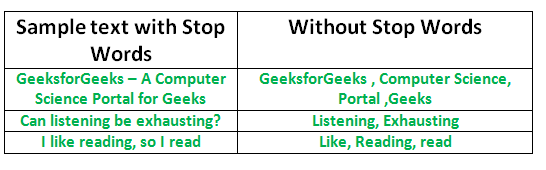

Download the stop words from nltk

In [ ]:
# @title
from nltk import download
download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Import stop words from spacy

In [ ]:
# @title
from nltk.corpus import stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

Join all options available in both libraries

In [ ]:
# @title
stop_words = list(set(stopwords.words('english')))
stop_words2 = list(STOP_WORDS)
stop_words = set(stop_words + stop_words2)

Make a copy without the symbol **\'**

In [ ]:
# @title
from copy import deepcopy

In [ ]:
# @title
stop_words_wc = deepcopy(stop_words)
stop_words_wc = [re.sub('[^\w\s]','', word) for word in stop_words_wc]

###### **2.2 Lematization**


- The text has to be normalized ("loving" -> "love"), this can be done with stemming or lematization.

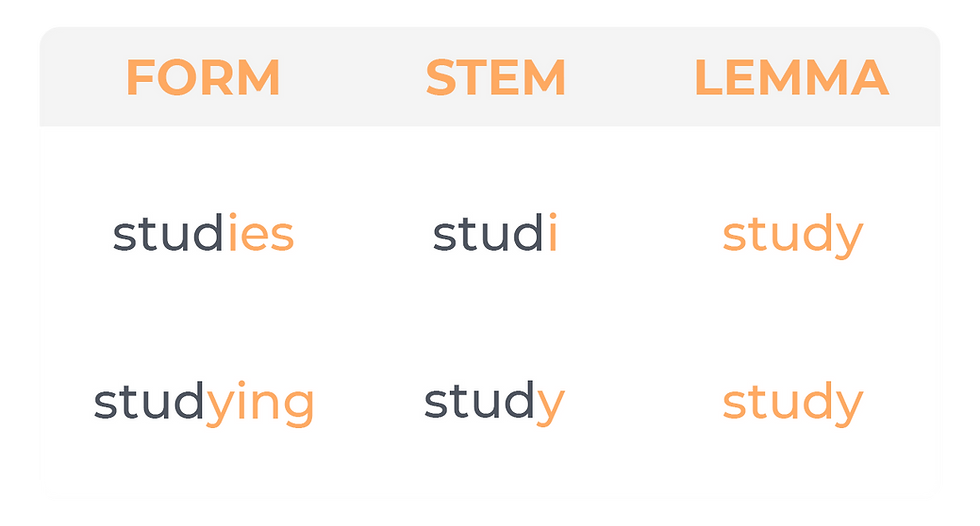

Download the library

In [ ]:
# @title
download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Import the library and create and object

In [ ]:
# @title
from nltk.stem import WordNetLemmatizer

In [ ]:
# @title
lemmatizer = WordNetLemmatizer()

###### **2.3 PoS tagging**

- The sustantives and their derivations are grammatical structures which really help to understand what happen in the text.

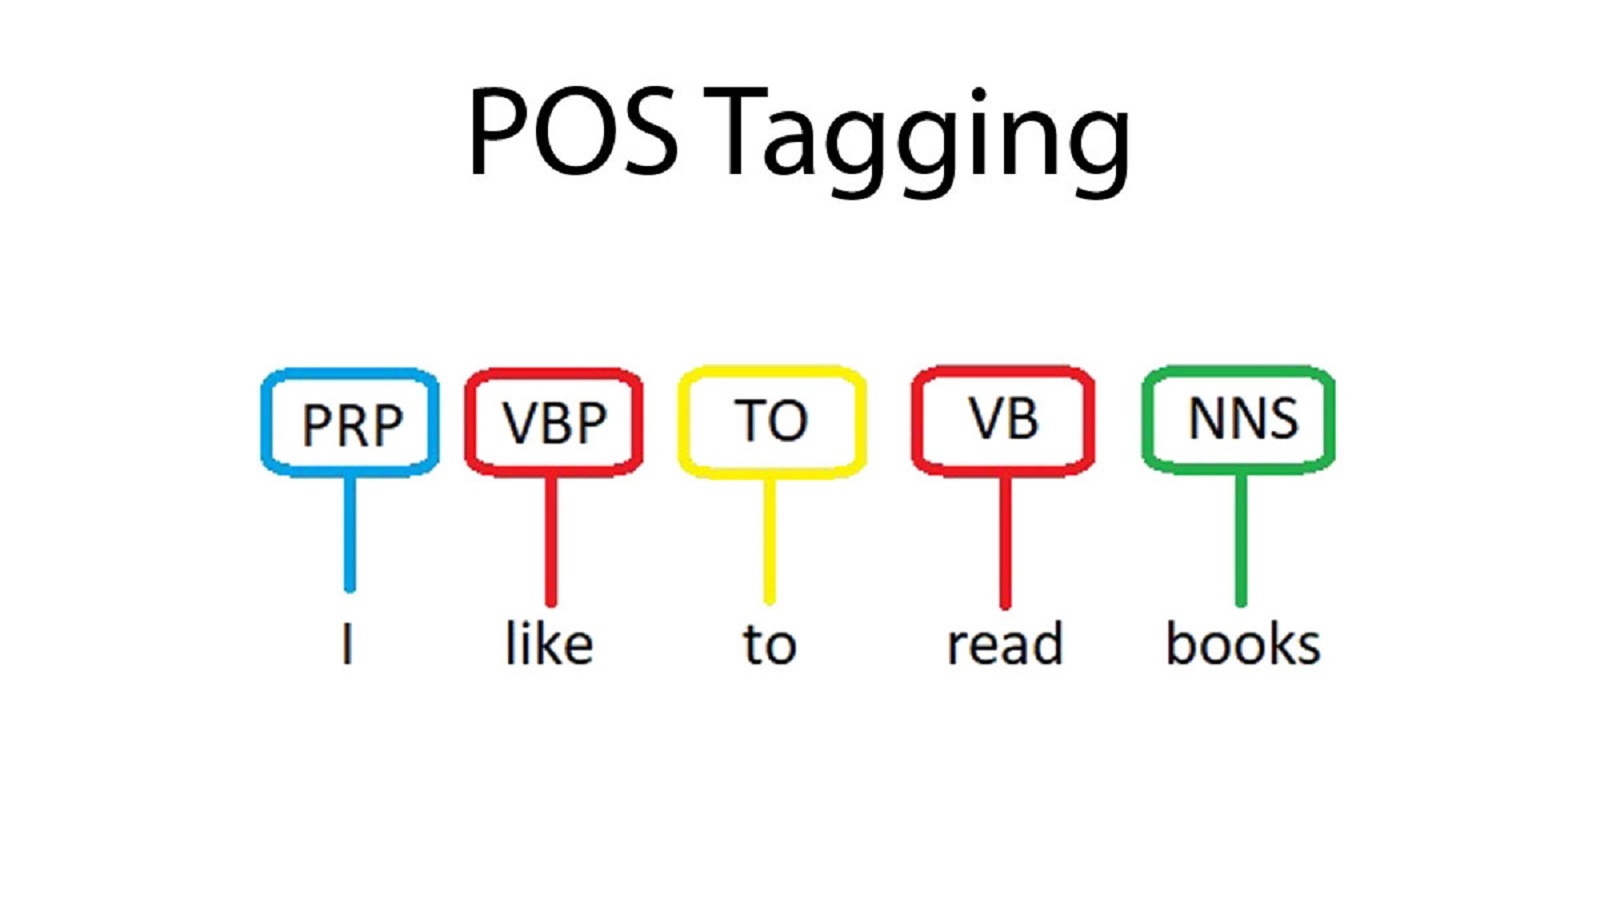

Download the library

In [ ]:
# @title
download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Import the library

In [ ]:
# @title
from nltk import pos_tag

###### **2.4 Node creation**

With all the previous objects, create an node to perform this action automatically.

In [ ]:
# @title
def nlp_cleaning(text):
  words = text.split()
  filtered_words = []
  for word in words:
      word = word.strip()
      if word not in stop_words and word not in stop_words_wc and len(word) >= 4:
          filtered_words.append(word)
  labeling = pos_tag(filtered_words)
  filtered_words = [word for word, label in labeling if label.startswith('NN')]
  filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  text = ' '.join(filtered_words)
  return text

##### **3. Pipeline creation**

Create a pipeline which joins all the previous actions.

The result of the first node is the input for the second node.

In [ ]:
def pipeline_text(value):
  a1 = clean_text(value)
  a2 = nlp_cleaning(a1)
  return a2

Apply all the transformations

In [ ]:
data_clean = [pipeline_text(value) for value in newsgroups.data]

In [ ]:
newsgroups.data[1]

'I bought a 386DX33 system a little over 2 years ago, and was satisfied with\neverything about Zeos.  That computer went off to grad school with my son and\nI replaced it with a 486DX2/66 pkg 4 (345 MBHD, 16MB ram) with Diamond Viper,\n128K level 2 cache, and tower upgrades, delete the CTX monitor.  I got a\n17" HP D1193A monitor employee purchase.  This is a *great* system, fast,\nquiet, solidly built, not a single glitch bringing it up.  Tech support seems \nbusier now than 2 years ago.  I called with a configuration question, and\nthey called back 4 hours later with the right answer.  I think there\'s a\nslight premium over Gateway prices, but IMHO Zeos is worth it. BTW they \nhave enough 800 lines that I\'ve never gotten a busy signal calling sales,\ncustomer service, or tech support. Now, you usually wait 5 or 10 minutes to\ntalk to someone, but at least you get in the queue and wait on their dime. '

In [ ]:
data_clean[1]

'bought system year zeos computer school diamond level cache tower monitor monitor employee purchase system glitch support busier year configuration question hour think there gateway price line sale customer service support minute wait dime'

## **Modeling Main Topic Identificacion**



**Interaction:** How can we represent the language into a mathematical form?


### **Unsupervised Model**

1. Define a vector which contains the information about the words available in each document.
2. Apply the NMF technique to identify "K-topics" in the corpus

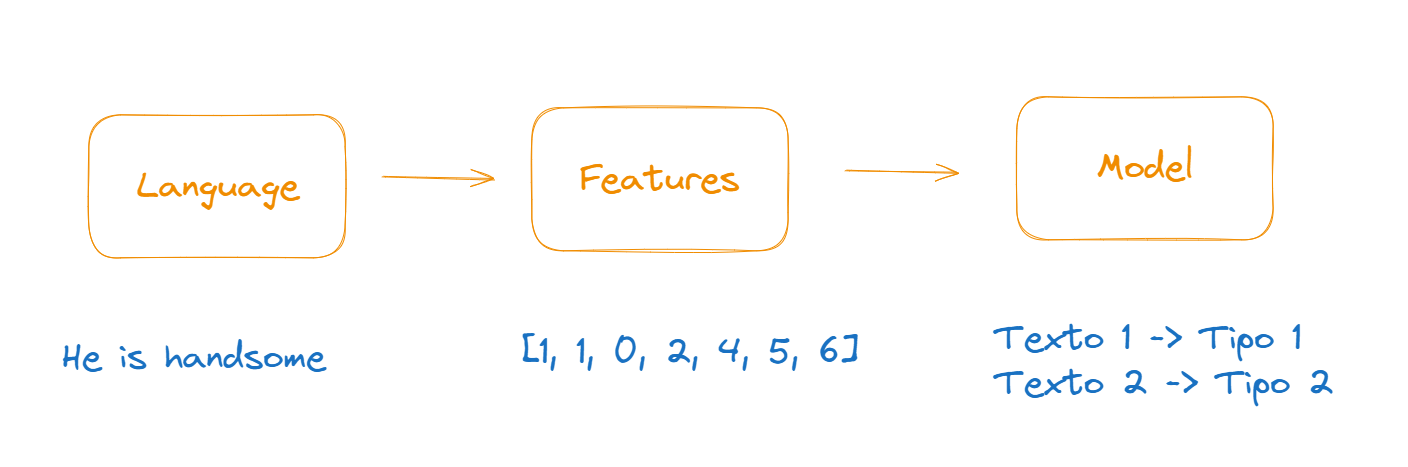

#### **Language Representation**

The most challenging activity in NLP is the transformation from text into numerical values. Every language has a different spectrum of combinations.

**Vectorial representation of data:**

**1. Bag of Words**

Bag of words is a naive representation where a vector is built based on how many times a word is repeated.

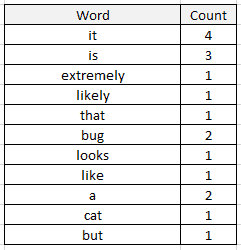

**2. TF-IDF**

The TF-IDF follows a similar logic as bag of word does. However, TF-IDF normalizes the feature importance of each word along all corpus.

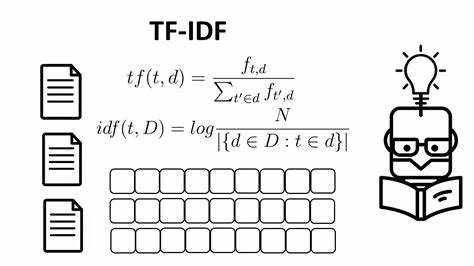

Import the needed libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import numpy as np
import pandas as pd

Create tf-idf vectorizer

In [ ]:
tfidf = TfidfVectorizer(min_df=0.01, max_df=0.99)

Train the vectorizer with the data cleaned

In [ ]:
matrix = tfidf.fit_transform(np.array(data_clean))

In [ ]:
matrix[1].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### **NMF**

**Interaction: **

What is matrix decomposition?

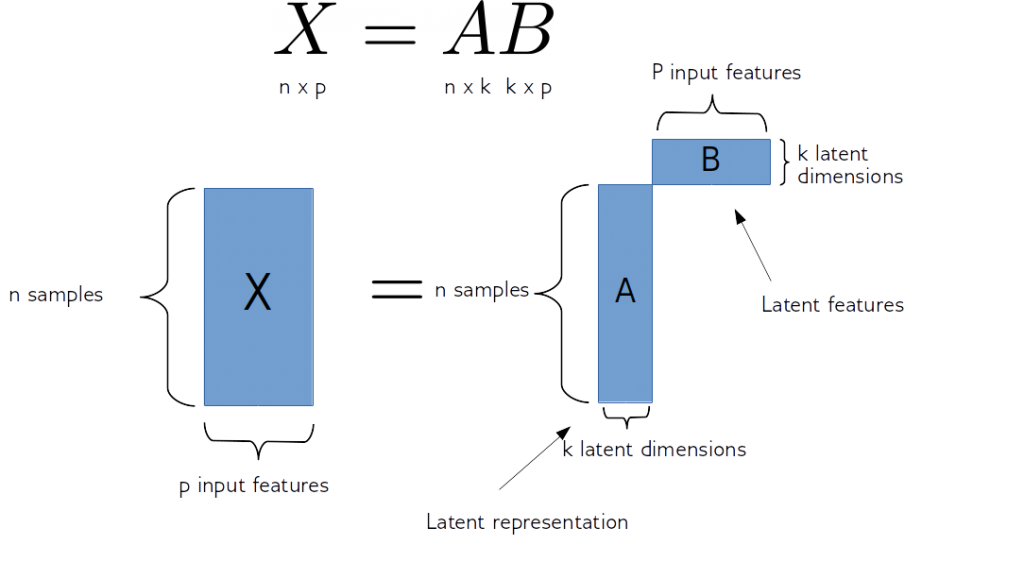

**Main idea:**

$ n_{documents}$ X $words$ = $n_{documents}$ X $k_{features}$ * $k_{features}$ X $ words $


Target matrix: $k_{features}$ X $ words $

Create a class to simplify the training process

In [ ]:
# @title
from sklearn.decomposition import NMF

In [ ]:
# @title
%%capture
!pip install mlflow dagshub

In [ ]:
# @title
import mlflow
import dagshub
from google.colab import userdata
import os

In [ ]:
# @title
class SuperNMF(NMF):
  """
  This class is used to simplify the training process of NMF.
  It is based on the NMF class from sklearn.decomposition.

  Args:
    n_components (int): number of k features of the NMF
    matrix (pd.DataFrame): matrix of the data
    vectorizer (sklearn.feature_extraction.text.TfidfVectorizer): vectorizer of the data
  """
  def __init__(self, n_components, matrix, vectorizer):
    super().__init__(n_components=n_components)
    self.n_components = n_components
    self.matrix = matrix
    self.vectorizer = vectorizer

  def fit(self):
    self.df_kfeatures = self.fit_transform(self.matrix)
    self._register_model()
    return self

  def results(self, top):
    df_features = pd.DataFrame(self.components_, columns=self.vectorizer.get_feature_names_out())
    for topic in range(df_features.shape[0]):
      tmp = df_features.iloc[topic]
      print(f'For topic {topic+1} the words with the highest value are:')
      print(tmp.nlargest(top))
      print('\n')

  def predict(self, name_cols):
    df = pd.DataFrame(self.df_kfeatures, columns=name_cols)
    df["label"] = df.apply(lambda row: row.idxmax(), axis=1)
    return df

  def _register_model(self):
    mlflow.set_tracking_uri(userdata.get('dagshub_mlflow'))
    os.environ['MLFLOW_TRACKING_USERNAME'] = userdata.get('MLFLOW_TRACKING_USERNAME')
    os.environ['MLFLOW_TRACKING_PASSWORD'] = userdata.get('MLFLOW_TRACKING_PASSWORD')
    mlflow.set_experiment('quito-ai-day')
    with mlflow.start_run(run_name="model_" + str(self.n_components) + "_features"):
      # log the NMF model
      mlflow.sklearn.log_model(self, "nmf_model")
      # log the TF-IDF model
      mlflow.sklearn.log_model(self.vectorizer, "tfidf_model")
      mlflow.end_run()

Let's see what we have for 10 components

In [ ]:
model1 = SuperNMF(n_components=10, matrix=matrix, vectorizer=tfidf)

In [ ]:
model1.fit()

2024/07/30 15:31:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/30 15:31:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/07/30 15:31:31 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/30 15:31:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_10_features at: https://dagshub.com/sebassaras02/quito-ai-day.mlflow/#/experiments/0/runs/2ee0b8027bc54523aeef2677fdec4326.
2024/07/30 15:31:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/sebassaras02/quito-ai-day.mlflow/#/experiments/0.


SuperNMF(matrix=<8359x513 sparse matrix of type '<class 'numpy.float64'>'
	with 103553 stored elements in Compressed Sparse Row format>,
         n_components=10, vectorizer=TfidfVectorizer(max_df=0.99, min_df=0.01))

In [ ]:
model1.results(20)

For topic 1 the words with the highest value are:
government    2.015064
state         1.730837
child         0.963704
jew           0.948581
right         0.893253
country       0.856124
armenian      0.824409
israel        0.728907
weapon        0.645433
case          0.599297
world         0.593535
crime         0.571732
president     0.558674
fire          0.550872
population    0.540742
force         0.531120
fact          0.528294
power         0.513129
woman         0.484800
house         0.475911
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
game        3.161387
baseball    0.321759
night       0.310257
series      0.269183
goal        0.258640
playoff     0.237138
time        0.224468
season      0.203476
play        0.165108
hockey      0.158580
fan         0.158128
score       0.148355
pitch       0.126976
boston      0.123306
penalty     0.120568
period      0.109595
home        0.109211
pitcher     0.108892
wing        0.103611
run         0.1

What about 7 components

In [ ]:
model2 = SuperNMF(n_components=7, matrix=matrix, vectorizer=tfidf)

In [ ]:
model2.fit()

2024/07/30 15:31:46 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/30 15:31:46 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/07/30 15:31:55 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/30 15:31:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_7_features at: https://dagshub.com/sebassaras02/quito-ai-day.mlflow/#/experiments/0/runs/ceb0a3409528443096d70ed63d962cb7.
2024/07/30 15:31:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/sebassaras02/quito-ai-day.mlflow/#/experiments/0.


SuperNMF(matrix=<8359x513 sparse matrix of type '<class 'numpy.float64'>'
	with 103553 stored elements in Compressed Sparse Row format>,
         n_components=7, vectorizer=TfidfVectorizer(max_df=0.99, min_df=0.01))

In [ ]:
model2.results(20)

For topic 1 the words with the highest value are:
people        3.645518
government    1.258884
state         1.027392
country       0.566738
armenian      0.561932
child         0.556859
right         0.530727
jew           0.525417
crime         0.436418
force         0.411214
weapon        0.392143
group         0.388916
israel        0.384354
world         0.372317
population    0.348007
number        0.333506
president     0.306167
death         0.304259
fire          0.299228
muslim        0.290267
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
game        3.138581
baseball    0.323890
night       0.311268
series      0.273320
goal        0.254715
playoff     0.236551
time        0.211662
season      0.198256
play        0.162670
fan         0.160490
hockey      0.158163
score       0.147706
pitch       0.126485
boston      0.123982
penalty     0.118613
home        0.111402
pitcher     0.108546
period      0.106333
run         0.103657
wing        0.1

What about 3 components

In [ ]:
model3 = SuperNMF(n_components=3, matrix=matrix, vectorizer=tfidf)

In [ ]:
model3.fit()

2024/07/30 15:32:11 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/30 15:32:11 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/07/30 15:32:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/30 15:32:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_3_features at: https://dagshub.com/sebassaras02/quito-ai-day.mlflow/#/experiments/0/runs/3ac7b506c13d4d1a9090c59a3c966eb7.
2024/07/30 15:32:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/sebassaras02/quito-ai-day.mlflow/#/experiments/0.


SuperNMF(matrix=<8359x513 sparse matrix of type '<class 'numpy.float64'>'
	with 103553 stored elements in Compressed Sparse Row format>,
         n_components=3, vectorizer=TfidfVectorizer(max_df=0.99, min_df=0.01))

In [ ]:
model3.results(20)

For topic 1 the words with the highest value are:
people        2.082191
time          0.970918
thing         0.791789
year          0.729650
government    0.698616
state         0.643657
fact          0.570862
question      0.544878
life          0.538461
point         0.521590
word          0.518595
child         0.485066
world         0.483339
jesus         0.469955
case          0.465708
church        0.457034
reason        0.444092
person        0.443873
religion      0.426142
group         0.424461
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
game        2.554684
team        1.123317
year        0.863732
player      0.788097
season      0.536156
baseball    0.419900
time        0.336037
playoff     0.319874
goal        0.317255
play        0.315894
series      0.294585
night       0.288425
league      0.283447
hockey      0.282189
fan         0.255325
point       0.179628
boston      0.168174
pitcher     0.164955
ranger      0.161512
division    0.1

In [ ]:
df_final = model3.predict(["religion", "sports", "computer"])

In [ ]:
df_final.iloc[250:260]

,religion,sports,computer,label
250,0.043275,0.000000,0.030710,religion
251,0.052246,0.000000,0.000000,religion
252,0.000000,0.000000,0.000000,religion
253,0.012195,0.010248,0.049895,computer
254,0.037546,0.000000,0.014246,religion
255,0.000000,0.000000,0.000000,religion
256,0.000000,0.060903,0.064904,computer
257,0.000000,0.000000,0.116905,computer
258,0.007921,0.016111,0.002665,sports
259,0.075176,0.000000,0.015098,religion


In [ ]:
newsgroups.data[250]

"\nNo one was ever flogged, beaten, burned, fed to the lions, or killed in any\nother way because of a belief in the resurrection - sorry to disappoint you.\nThe idea of resurrection is one which can be found in a host of different\nforms in the religions of antiquity.  The problem was not the resurrection\nwhich was a mediorce issue for a tiny fragment of the Jewish population \n(the Saducees) but was a non issues for everyone else.  The real problem was\nthat Christians were pacifist and preached there was only one god.  When the\nstate operates by a system of divinitation of the emperor -  monotheism \nbecomes a capital offense.  The Jews were able to get exemption from this,\nand were also not evangelistic.  Christians were far more vocal, and gentile,\nand hence dangerous and were therefore targets of persecution.  Also since\nChristians were a relatively powerless group, they made good scapegoats as is\nseen by Nero's blaming them for the burning of Rome.  Let's not cloud the\nis

In [ ]:
newsgroups.data[253]

"\n\n\nHow about some numbers here? Some kind of benchmark?\nIf you want, let me start it - 486DX2-66 - 32 SPECint92, 16 SPECfp92 .\n\n\n\nNumbers? Pentium @66MHz - 65 SPECint92, 57 SPECfp92 .\n\t PowerPC @66MHz - 50 SPECint92, 80 SPECfp92 . (Note this is the 601)\n        (Alpha @150MHz  - 74 SPECint92,126 SPECfp92 - just for comparison)\n\n\n\nNot in a clock-doubled system. There isn't a doubling in performance, but\nit _is_ quite significant. Maybe about a 70% increase in performance.\n\nBesides, for 0 wait state performance, you'd need a cache anyway. I mean,\nwho uses a processor that runs at the speed of 80ns SIMMs? Note that this\nmemory speed corresponds to a clock speed of 12.5 MHz.\n\n\nNumbers?\n\n-- \nRavikumar Venkateswar\nrvenkate@uiuc.edu"

In [ ]:
newsgroups.data[258]

'\nI didn\'t say that pitcher\'s fear of throwing strikes to guys like\nMcGwire, Bonds, and Frank Thomas was rational.  \nI just said that it exists.\n\n\nI don\'t know Alex Cole\'s batting style at all.   Some questions:\nHow tall is he?\nDoes he go into a crouch like Rickey Hederson/Pete Rose?\nDoes he foul off a lot of pitches like Brett Butler?\nDoes he take 1 or 2 strikes in each at bat?\n\nIt could be the Cole has a good batting "eye".\nLook above, I said that *many* high OBP guys draw their walks because\npitchers are afraid to throw a strike to them, not "all" high OBP guys.'

## **Conclusions**

- The model behaves as it was expected.

## **Model repositories**:

- GitHub: https://github.com/sebassaras02/quito-ai-day
- Dagshub: https://dagshub.com/sebassaras02/quito-ai-day

## **Questions**



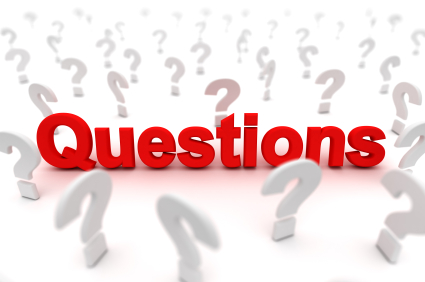